In [1]:
# dependencies
import pandas as pd
import numpy as np

In [2]:
# read in CSV
all_wines = pd.read_csv('Data/winemag-data-130k-v2.csv')
all_wines.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# add vintage year based on year in title
all_wines['vintage'] = all_wines['title'].str.extract('(\d\d\d\d)', expand=True)

# filling in known variety for nulls
all_wines.iloc[86909, 7] = 'Syrah-Petite Sirah'

# drop unneeded columns
clean_wines = all_wines.drop(columns=['Unnamed: 0', 'description', 'designation', 'region_1', 'region_2', 'title', \
                                      'taster_name', 'taster_twitter_handle'])

# sample
clean_wines.sample(10)

,country,points,price,province,variety,winery,vintage
100163,US,90,25.0,California,Pinot Noir,Black Stallion,2014
126874,France,84,30.0,Bordeaux,Rosé,Château Mémoires,2016
54255,US,95,58.0,Washington,Bordeaux-style Red Blend,Force Majeure,2010
31692,US,81,23.0,Virginia,Seyval Blanc,Valerie Hill,2011
2344,France,85,NaN,Loire Valley,Rosé,Le Roi des Pierres,2014
2328,US,85,12.0,California,Chardonnay,Angel's Cup,2013
14791,US,91,65.0,California,Cabernet Sauvignon,Sbragia,2013
21283,Portugal,87,9.0,Tejo,Portuguese Red,Quinta do Casal Monteiro,2014
97663,US,87,18.0,California,Sauvignon Blanc,Rutherford Ranch,2015
48111,Portugal,89,16.0,Douro,Portuguese White,Quinta de la Rosa,2015


In [4]:
# filling in known country for nulls
has_country = clean_wines[pd.notnull(clean_wines['country'])]
has_country_series = pd.Series(data=has_country['country'].values, index=has_country['winery'])
has_country_dict = has_country_series.to_dict()
clean_wines.loc[clean_wines['country'].isnull(), 'country'] \
    = clean_wines['country'].fillna(clean_wines['winery'].map(has_country_dict))

# drop the remaining nulls
clean_wines = clean_wines.dropna()

# replace variety names with common wine names
clean_wines['variety'] = clean_wines['variety'].replace(['Weissburgunder'], 'Chardonnay')
clean_wines['variety'] = clean_wines['variety'].replace(['Spatburgunder'], 'Pinot Noir')
clean_wines['variety'] = clean_wines['variety'].replace(['Grauburgunder'], 'Pinot Gris')
clean_wines['variety'] = clean_wines['variety'].replace(['Garnacha'], 'Grenache')
clean_wines['variety'] = clean_wines['variety'].replace(['Pinot Nero'], 'Pinot Noir')
clean_wines['variety'] = clean_wines['variety'].replace(['Alvarinho'], 'Albarino')

# sample
clean_wines.sample(10)

,country,points,price,province,variety,winery,vintage
76912,US,87,18.0,New York,Merlot,Coffee Pot Cellars,2008
31920,Italy,90,130.0,Tuscany,Sangiovese Grosso,Fattoria dei Barbi,2007
94379,US,90,38.0,Washington,Riesling,Dunham,2016
67656,Italy,94,90.0,Piedmont,Nebbiolo,Aldo Conterno,2013
52520,Spain,87,15.0,Central Spain,Red Blend,Tinedo,2014
103013,US,85,22.0,Virginia,Bordeaux-style Red Blend,Naked Mountain,2008
127953,US,84,32.0,California,Chardonnay,Sunstone,2008
123634,France,87,14.0,Rhône Valley,Rhône-style White Blend,Ferraton Pere et Fils,2010
94549,South Africa,91,32.0,Western Cape,Chardonnay,Vins d'Orrance,2013
27661,Italy,90,25.0,Tuscany,Red Blend,Ruffino,2005


count    116778.000000
mean         88.457406
std           3.045578
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

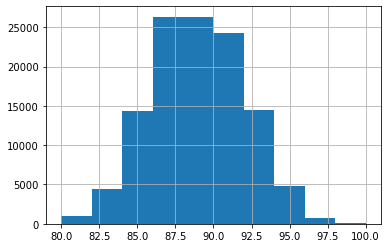

In [5]:
# plot histogram
clean_wines['points'].hist()

# decribe dataframe
clean_wines['points'].describe()

In [6]:
# add rating
clean_wines['quality'] = clean_wines['points'].apply(lambda x: 'Good' if x >= 88 else 'Poor')
clean_wines = clean_wines.drop(columns = ['points'])

# create export of final dataframe
clean_wines.to_csv('Data/recommend_neural_model_df.csv')

# sample
clean_wines.sample(10)

,country,price,province,variety,winery,vintage,quality
116266,US,80.0,California,Pinot Noir,Foxen,2009,Good
113307,France,12.0,Southwest France,Rosé,Georges Vigouroux,2014,Poor
10068,US,50.0,California,Bordeaux-style Red Blend,Terlato,2013,Good
50575,France,26.0,Beaujolais,Gamay,Richard Rottiers,2012,Good
102817,US,64.0,California,Pinot Noir,Testarossa,2013,Good
38252,Spain,15.0,Northern Spain,Tempranillo,Bodegas Valdemar,2011,Good
79029,France,18.0,Southwest France,Red Blend,Domaine Rotier,2013,Poor
86875,Argentina,14.0,Mendoza Province,Malbec,Quattrocchi,2013,Poor
121433,Portugal,12.0,Lisboa,Portuguese White,Companhia das Quintas,2011,Poor
120471,US,35.0,Oregon,Tempranillo,Ledger David,2013,Poor


In [7]:
# LabelEncoder dependency
from sklearn.preprocessing import LabelEncoder

# create features
number = LabelEncoder()
features = clean_wines[['country','price','province','variety','winery','vintage']]
features['country'] = number.fit_transform(features['country'].astype('str'))
features['province'] = number.fit_transform(features['province'].astype('str'))
features['variety'] = number.fit_transform(features['variety'].astype('str'))
features['winery'] = number.fit_transform(features['winery'].astype('str'))

# features 
features.sample(10)

C:\Users\Rahil\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Rahil\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rahil\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,country,price,province,variety,winery,vintage
84773,3,22.0,250,230,12719,2014
57632,14,29.0,291,473,5773,2013
129426,30,25.0,275,433,7689,2014
42196,36,9.0,69,121,9357,2015
122618,8,12.0,208,102,11569,2000
15014,39,30.0,51,40,10162,2014
44423,39,30.0,401,67,13519,2014
21081,21,80.0,365,487,8050,2010
15815,14,22.0,36,58,2961,2009
76815,39,27.0,261,214,12110,2014


In [8]:
X = features
y = clean_wines['quality']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=6))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 402       
Total params: 42,002
Trainable params: 42,002
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
2737/2737 - 2s - loss: 0.5907 - accuracy: 0.6766
Epoch 2/100
2737/2737 - 3s - loss: 0.5474 - accuracy: 0.7186
Epoch 3/100
2737/2737 - 2s - loss: 0.5400 - accuracy: 0.7227
Epoch 4/100
2737/2737 - 2s - loss: 0.5383 - accuracy: 0.7248
Epoch 5/100
2737/2737 - 3s - loss: 0.5355 - accuracy: 0.7255
Epoch 6/100
2737/2737 - 3s - loss: 0.5331 - accuracy: 0.7274
Epoch 7/100
2737/2737 - 3s - loss: 0.5326 - accuracy: 0.7277
Epoch 8/100
2737/2737 - 3s - loss: 0.5312 - accuracy: 0.7285
Epoch 9/100
2737/2737 - 3s - loss: 0.5308 - accuracy: 0.7300
Epoch 10/100
2737/2737 - 3s - loss: 0.5287 - accuracy: 0.7313
Epoch 11/100
2737/2737 - 3s - loss: 0.5292 - accuracy: 0.7315
Epoch 12/100
2737/2737 - 3s - loss: 0.5272 - accuracy: 0.7304
Epoch 13/100
2737/2737 - 3s - loss: 0.5264 - accuracy: 0.7320
Epoch 14/100
2737/2737 - 3s - loss: 0.5262 - accuracy: 0.7319
Epoch 15/100
2737/2737 - 3s - loss: 0.5252 - accuracy: 0.7330
Epoch 16/100
2737/2737 - 3s - loss: 0.5248 - accuracy: 0.7327
Epoch 17/100
2737

In [13]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

913/913 - 1s - loss: 0.5198 - accuracy: 0.7391
Normal Neural Network - Loss: 0.5198115110397339, Accuracy: 0.7390991449356079


In [14]:
encoded_predictions = model.predict_classes(X_test_scaled[:])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [15]:
d = {'prediction' : prediction_labels, 
     'actual' : y_test}

In [16]:
predictions_df = pd.DataFrame(data=d)
predictions_df

,prediction,actual
126006,Poor,Poor
108833,Poor,Poor
9602,Good,Good
45714,Good,Good
74267,Good,Poor
...,...,...
11437,Poor,Good
91443,Good,Good
17882,Good,Good
1548,Poor,Poor


In [17]:
predictions_df.to_csv('Data/recommend_neural_model_predictions_df.csv')